In [87]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
# Velocity Model
nx, ny, nz = 50, 50, 50
dx, dy, dz = 4, 4, 4
x, y, z = np.arange(nx)*dx, np.arange(ny)*dy, np.arange(nz)*dz

v0 = 1000 # initial velocity
kv = 0. # gradient
vel = np.outer(np.ones(nx), v0 +kv*z) 

# 3D

In [101]:
# Define Receiver grid as lines in X and Z
nr_z = 5
nr_x = 5
nr_y = 5
rec_string = '%i-by-%i-by-%i'%(nr_x,nr_y,nr_z)
rec_buffer = 5 



In [102]:
# RECEIVER GRID - ONLY ON CUBE SURFACES
grid_z_locs = np.linspace(rec_buffer*dz, (nz-rec_buffer)*dz, nr_z)
grid_x_locs = np.linspace(rec_buffer*dx, (nx-rec_buffer)*dx, nr_x)
grid_y_locs = np.linspace(rec_buffer*dy, (ny-rec_buffer)*dy, nr_y)

F0_rx, F0_ry, F0_rz = np.meshgrid(0,           grid_y_locs, grid_z_locs)      # X face 0 
F1_rx, F1_ry, F1_rz = np.meshgrid(nx*dx,       grid_y_locs, grid_z_locs)      # X face 1 
F2_rx, F2_ry, F2_rz = np.meshgrid(grid_x_locs, 0,           grid_z_locs)      # Y face 0 
F3_rx, F3_ry, F3_rz = np.meshgrid(grid_x_locs, ny*dy,       grid_z_locs)      # Y face 1  
F4_rx, F4_ry, F4_rz = np.meshgrid(grid_x_locs, grid_y_locs, 0)   # Z face 0 
F5_rx, F5_ry, F5_rz = np.meshgrid(grid_x_locs, grid_y_locs, nz*dz)  # Z face 1 

grid_rx = np.vstack([rx.flatten() for rx in [F0_rx,F1_rx,F2_rx,F3_rx,F4_rx,F5_rx,]])
grid_ry = np.vstack([ry.flatten() for ry in [F0_ry,F1_ry,F2_ry,F3_ry,F4_ry,F5_ry,]])
grid_rz = np.vstack([rz.flatten() for rz in [F0_rz,F1_rz,F2_rz,F3_rz,F4_rz,F5_rz,]])
                     
gridded_recs = np.vstack((grid_rx.flatten(), grid_ry.flatten(), grid_rz.flatten()))
nr = gridded_recs.shape[1]

print (nr, gridded_recs.shape)

150 (3, 150)


In [103]:
# DAS  LINES 
# ----------------------------------------------------------------------
#                           VIL
# ----------------------------------------------------------------------
VIL_rx = np.vstack([rx.flatten() for rx in [F0_rx,F1_rx,F2_rx,F3_rx,]])
VIL_ry = np.vstack([ry.flatten() for ry in [F0_ry,F1_ry,F2_ry,F3_ry,]])
VIL_rz = np.vstack([rz.flatten() for rz in [F0_rz,F1_rz,F2_rz,F3_rz,]])              
VIL_recs = np.vstack((VIL_rx.flatten(), VIL_ry.flatten(), VIL_rz.flatten()))

# ----------------------------------------------------------------------
#                           VXL
# ----------------------------------------------------------------------
VXL_rx = np.vstack([rx.flatten() for rx in [F2_rx,F3_rx,F4_rx,F5_rx,]])
VXL_ry = np.vstack([ry.flatten() for ry in [F2_ry,F3_ry,F4_ry,F5_ry,]])
VXL_rz = np.vstack([rz.flatten() for rz in [F2_rz,F3_rz,F4_rz,F5_rz,]])              
VXL_recs = np.vstack((VXL_rx.flatten(), VXL_ry.flatten(), VXL_rz.flatten()))

# ----------------------------------------------------------------------
#                           H
# ----------------------------------------------------------------------
H_rx = np.vstack([rx.flatten() for rx in [F0_rx,F1_rx,F4_rx,F5_rx,]])
H_ry = np.vstack([ry.flatten() for ry in [F0_ry,F1_ry,F4_ry,F5_ry,]])
H_rz = np.vstack([rz.flatten() for rz in [F0_rz,F1_rz,F4_rz,F5_rz,]])              
H_recs = np.vstack((H_rx.flatten(), H_ry.flatten(), H_rz.flatten()))

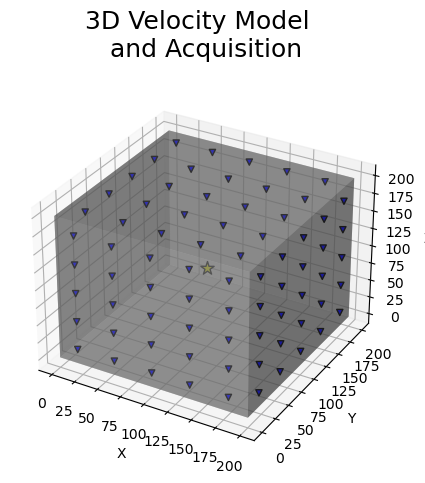

In [167]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [0,200]
Z0, Z1 = 0*np.ones_like(X), 200*np.ones_like(X)
X, Y = np.meshgrid(r, r)

ax.plot_surface(X,Y,Z1, color='grey', alpha=0.5, zorder=0.3)
ax.plot_surface(X,Y,Z0,color='grey',  alpha=0.5, zorder=0.3)
ax.plot_surface(X,Z0,Y, color='grey', alpha=0.5, zorder=0.3)
ax.plot_surface(X,Z1,Y, color='grey', alpha=0.5, zorder=0.3)
ax.plot_surface(Z0,X,Y, color='grey', alpha=0.5, zorder=0.3)
ax.plot_surface(Z1,X,Y, color='grey', alpha=0.5, zorder=0.3)


# # SOURCE
ax.scatter3D(100, 100, 100, alpha=1, color='yellow', marker='*', edgecolor='k', s=100, label='Source');

ax.scatter3D(F2_rx, F2_ry, F2_rz,alpha=1, color='blue', marker='v', edgecolor='k', label='Point Recs');
ax.scatter3D(F5_rx, F5_ry, F5_rz,alpha=1, color='blue', marker='v', edgecolor='k', );
ax.scatter3D(F1_rx, F1_ry, F1_rz,alpha=1, color='blue', marker='v', edgecolor='k', );


# # Orientation One
# for i,x in enumerate(grid_x_locs):
#     if i==0:
#         ax.plot3D([x,x,x], [0,0,200], [0, 200,200], 'green', label='Loop 1')
#     else: 
#         ax.plot3D([x,x,x], [0,0,200], [0, 200,200], 'green')
# # Orientation Two
# for i,y in enumerate(grid_y_locs):
#     if i==0:
#         ax.plot3D([200,200,0], [y,y,y], [0, 200,200], color='red', label='Loop 2')
#     else:
#         ax.plot3D([200,200,0], [y,y,y], [0, 200,200], color='red')
# # Orientation Two
# for i,z in enumerate(grid_z_locs):
#     if i==0:
#         ax.plot3D([0,200,200], [0,0,200], [z, z, z], color='blue', label='Loop 3')
#     else:
#         ax.plot3D([0,200,200], [0,0,200], [z, z, z], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.suptitle('3D Velocity Model \n and Acquisition', fontsize=18)
plt.tight_layout()

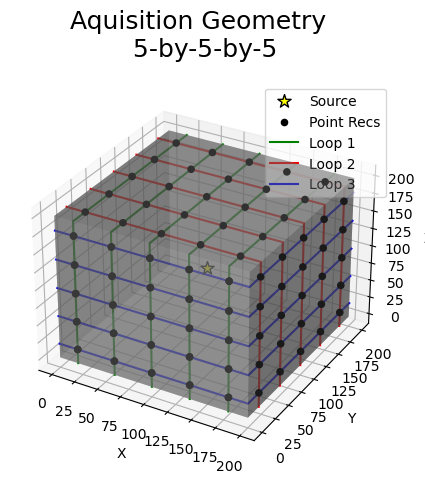

In [156]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [0,200]
Z0, Z1 = 0*np.ones_like(X), 200*np.ones_like(X)
X, Y = np.meshgrid(r, r)

ax.plot_surface(X,Y,Z1, color='grey', alpha=0.5)
ax.plot_surface(X,Y,Z0,color='grey',  alpha=0.5)
ax.plot_surface(X,Z0,Y, color='grey', alpha=0.5)
ax.plot_surface(X,Z1,Y, color='grey', alpha=0.5)
ax.plot_surface(Z0,X,Y, color='grey', alpha=0.5)
ax.plot_surface(Z1,X,Y, color='grey', alpha=0.5)


# SOURCE
ax.scatter3D(100, 100, 100, alpha=1, color='yellow', marker='*', edgecolor='k', s=100, label='Source');

ax.scatter3D(F2_rx, F2_ry, F2_rz,alpha=1, color='k', label='Point Recs');
ax.scatter3D(F5_rx, F5_ry, F5_rz,alpha=1, color='k');
ax.scatter3D(F2_rx, F2_ry, F2_rz,alpha=1, color='k');
ax.scatter3D(F1_rx, F1_ry, F1_rz,alpha=1, color='k');


# Orientation One
for i,x in enumerate(grid_x_locs):
    if i==0:
        ax.plot3D([x,x,x], [0,0,200], [0, 200,200], 'green', label='Loop 1')
    else: 
        ax.plot3D([x,x,x], [0,0,200], [0, 200,200], 'green')
# Orientation Two
for i,y in enumerate(grid_y_locs):
    if i==0:
        ax.plot3D([200,200,0], [y,y,y], [0, 200,200], color='red', label='Loop 2')
    else:
        ax.plot3D([200,200,0], [y,y,y], [0, 200,200], color='red')
# Orientation Two
for i,z in enumerate(grid_z_locs):
    if i==0:
        ax.plot3D([0,200,200], [0,0,200], [z, z, z], color='blue', label='Loop 3')
    else:
        ax.plot3D([0,200,200], [0,0,200], [z, z, z], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# ax.view_init(15, 135)
plt.legend(loc=1)

plt.suptitle('Aquisition Geometry \n %s'%rec_string, fontsize=18)
plt.tight_layout()

In [ ]:
# Velocity Model
nx, nz = 101, 101
dx, dz = 4, 4
x, z = np.arange(nx)*dx, np.arange(nz)*dz
v0 = 1000 # initial velocity
kv = 0. # gradient
vel = np.outer(np.ones(nx), v0 +kv*z) 

# Microseismic sources
xmicro = [nx//4, nx//2,  3*(nx//4), ]
zmicro = [nz//4, nz//4,  3*(nz//4), ]
ampmicro = [1,1,1]
ns = len(zmicro)

microseismic = np.zeros((ns, nx, nz))
event_dictionary = []
for ev in range(ns):
    microseismic[ev, xmicro[ev], zmicro[ev]] = ampmicro[ev]
    event_dictionary.append({'event':ev,
                             'sx':xmicro[ev],
                             'sz':zmicro[ev],
                             'amp':ampmicro[ev],
                            })